### Autocorrelation and Partial Autocorrelation of BTC daily returns - [for explanation read here](https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
%matplotlib inline


In [3]:
# Read in BTC prices
btc_prices = pd.read_csv('/Users/draganbogatic/Documents/Fin_Tech/crypto-analysis/resources/BTC-USD.csv', usecols=['Date','Adj Close'], parse_dates=True)
btc_prices = btc_prices.set_index('Date')
btc_prices['daily_return'] = btc_prices['Adj Close'].pct_change()
btc_prices = btc_prices.dropna()
btc_prices

,Adj Close,daily_return
Date,,
2014-09-18,424.440002,-0.071926
2014-09-19,394.795990,-0.069843
2014-09-20,408.903992,0.035735
2014-09-21,398.821014,-0.024659
2014-09-22,402.152008,0.008352
...,...,...
2022-01-05,43569.003906,-0.050734
2022-01-06,43160.929688,-0.009366
2022-01-07,41557.902344,-0.037141


In [31]:
# Calculate daily return and lagged return
btc_prices['lag_return'] = btc_prices['daily_return'].shift()
btc_prices['return_diff'] = btc_prices['daily_return'].diff()
btc_prices.head()

,Adj Close,daily_return,lag_return,return_diff
Date,,,,
2014-09-18,424.440002,-0.071926,NaN,NaN
2014-09-19,394.795990,-0.069843,-0.071926,0.002083
2014-09-20,408.903992,0.035735,-0.069843,0.105578
2014-09-21,398.821014,-0.024659,0.035735,-0.060393
2014-09-22,402.152008,0.008352,-0.024659,0.033011


Text(0.5, 1.0, 'BTC Daily vs Lagged Return')

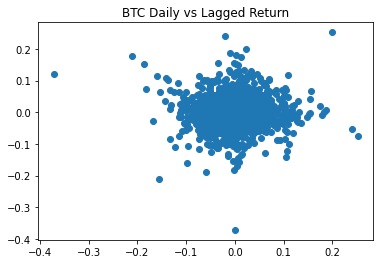

In [32]:
# Scatter plot of lagged return vs daily_return
x = btc_prices['lag_return']
y = btc_prices['daily_return']
plt.scatter(x, y)
plt.title('BTC Daily vs Lagged Return')

<AxesSubplot:title={'center':'30-day returns'}, xlabel='Date', ylabel='daily return'>

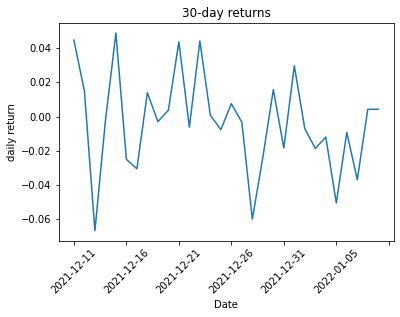

In [33]:
# Plot of last 30 days of daily return
btc_prices.daily_return[-30:].plot(title='30-day returns', rot=45, ylabel='daily return')

In [34]:
# Autocorrelation lag 1
btc_prices['daily_return'].autocorr(lag=1)

-0.02114132564913241

In [35]:
# Autocorrelation lag 30
btc_prices['daily_return'].autocorr(lag=30)

0.010442610283599474

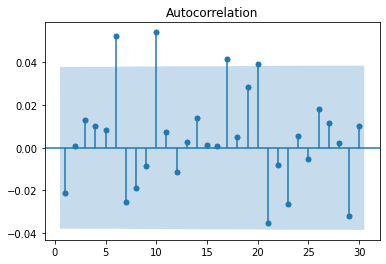

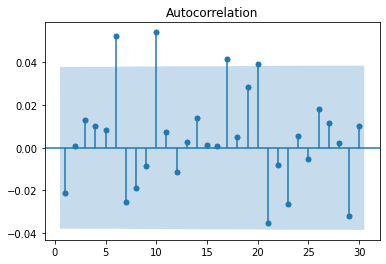

In [36]:
# Plot autocorrelation at different lags
plot_acf(btc_prices['daily_return'], lags=30, zero = False)

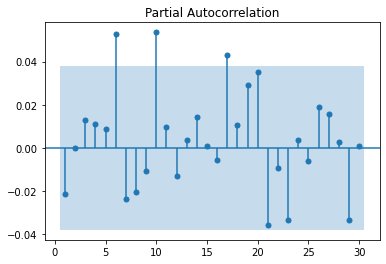

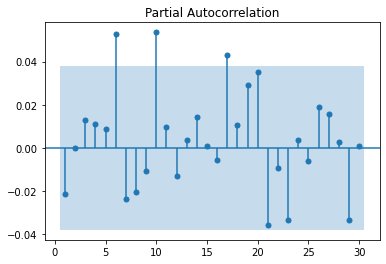

In [22]:
# Plot partial autocorrelation
sm.graphics.tsaplots.plot_pacf(btc_prices['daily_return'], lags=30, zero=False)